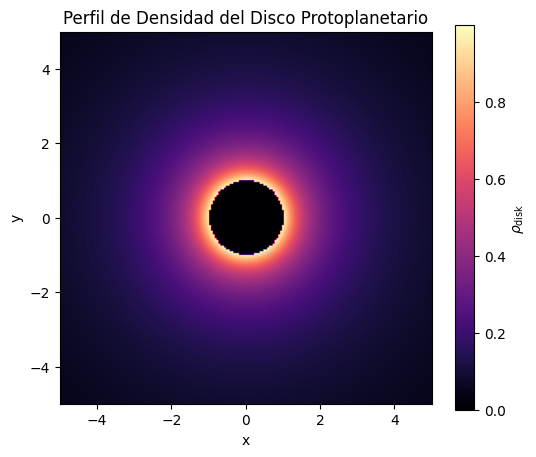

In [3]:
import matplotlib.pyplot as plt
import astropy.constants as const
import astropy.units as u
from formulas import density_profile
from formulas import Poisson_equation
from formulas import star_density
import numpy as np

#elegimos parametros generales
rho_0 = 1.0 #densidad de referencia
r_0 = 1.0 #radio de referencia
p = 1.5 #indice de densidad
r_min = 1.0 #radio del hueco interno

#creamos la malla
L = 5.0
N = 200
x = np.linspace(-L, L, N)
y = np.linspace(-L, L, N)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
rho_disk = density_profile(R, rho_0, r_0, p, r_min)

#graficamos
plt.figure(figsize=(6,5))
plt.imshow(rho_disk, extent=[-L, L, -L, L], origin='lower', cmap='magma')
plt.colorbar(label=r'$\rho_{\mathrm{disk}}$')   
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perfil de Densidad del Disco Protoplanetario')
plt.show()

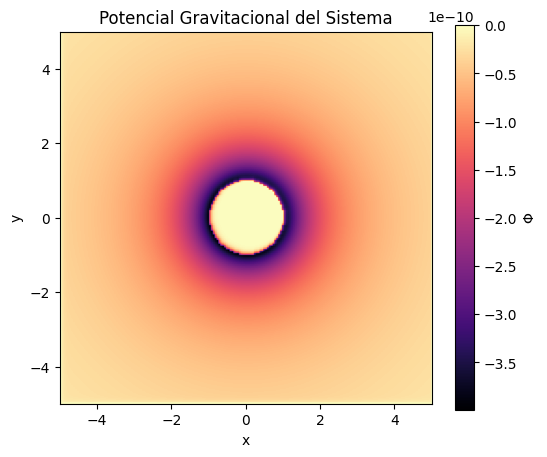

In [4]:
Mass_star = 1.989e30  # Masa del Sol
Radius_star = 0.00465  # Radio del Sol
star_density_profile = star_density(X, Y, Mass_star, Radius_star)

Gradient_potential = Poisson_equation(X, Y, 1, star_density_profile, rho_disk)
plt.figure(figsize=(6,5))
plt.imshow(Gradient_potential, extent=[-L, L, -L, L], origin='lower', cmap='magma')
plt.colorbar(label=r'$\Phi$')   
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potencial Gravitacional del Sistema')
plt.show()

El gradiente del potencial gravitatorio en coordenadas cartesianas se escribe como:

$$ \vec{g} = - \vec{\nabla} \Phi = - \left(  \frac{\partial \Phi}{\partial x} , \frac{\partial \Phi}{\partial y} \right) $$

Puede calcular las componentes del campo gravitatorio $\vec{g} = (g_x, g_y)$ como:

$$
\begin{align*}
g_x & = - \frac{\partial \Phi}{\partial x} \approx - \frac{\Phi(x + \Delta x, y) - \Phi(x - \Delta x, y)}{2 \Delta x} = - \frac{\Phi_{i+1, j} - \Phi_{i-1, j}}{2 \Delta x}  \\
g_y & = - \frac{\partial \Phi}{\partial y} \approx - \frac{\Phi(x, y + \Delta y) - \Phi(x, y - \Delta y)}{2 \Delta y} = - \frac{\Phi_{i, j+1} - \Phi_{i, j-1}}{2 \Delta y} 
\end{align*}
$$

In [21]:
dx = dy = 1

# Definir un campo U de ejemplo (matriz 4x4)
U = np.array([
    [0, 2, 4, 6],
    [1, 3, 5, 7],
    [2, 4, 6, 8],
    [3, 5, 7, 9],
])

# Definir el tamaño de los pasos en cada dirección (dx, dy)
dx = dy = 1

# Calcular la derivada en el eje x (a lo largo de las columnas)
dU_dx = (U[:, 2:] - U[:, :-2]) / (2 * dx)

# Calcular la derivada en el eje y (a lo largo de las filas)
dU_dy = (U[2:, :] - U[:-2, :]) / (2 * dy)

In [22]:
kpc = 3.086e19  #metros, 1 kpc en metros
Nx, Ny = 200, 200  #tamaño de la malla
Lx, Ly = 5.0 * kpc, 5.0 * kpc  #dimensiones físicas del espacio en metros
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)  #pasos espaciales en metros
G = 6.67430e-11  #constante de gravitación universal en m^3 kg^-1 s^-2

gx = np.zeros(shape=(Nx-2,Ny-2))
gy = np.zeros_like(gx)

for i in range(1, Nx-2):
    for j in range(1, Ny-2):
        gx[i,j] = -(Gradient_potential[i+1,j] - Gradient_potential[i-1,j])/(2*dx) 
        gy[i,j] = -(Gradient_potential[i,j+1] - Gradient_potential[i,j-1])/(2*dy) 


#plt.streamplot(X[1:-1, 1:-1],Y[1:-1,1 :-1],gx.T,gy.T, density=1)
#plt.pcolormesh(X.T,Y.T,Gradient_potential,cmap="magma")
#plt.colorbar(label="Potencial gravitatorio (J/kg)")
#plt.show()